In [ ]:
#Importing the necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import io
import graphviz


# **Reading Data from File into Pandas Dataframe**

In [ ]:
#Importing the data from the dataset as a Dataframe
data = pd.read_csv(io.BytesIO(uploaded["breast_cancer_wisconsin.csv"]))

data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Taking the diagnosis as the class label, the dataframe can be split into the features and the target as x, and y respectively.
Further, the columns 'id' and 'Unnamed: 32' do not serve any purpose towards classification and can hence be dropped.

In [ ]:
y = data['diagnosis']

data = data.drop(['id','Unnamed: 32'], axis=1)
x = data.drop(['diagnosis'], axis=1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Visualisation of the Dataset using Seaborn plots**

The first plot is a **violin plot** to depict the distribution of the data points for both class labels. The data is standardized before plotting the values for better readability.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

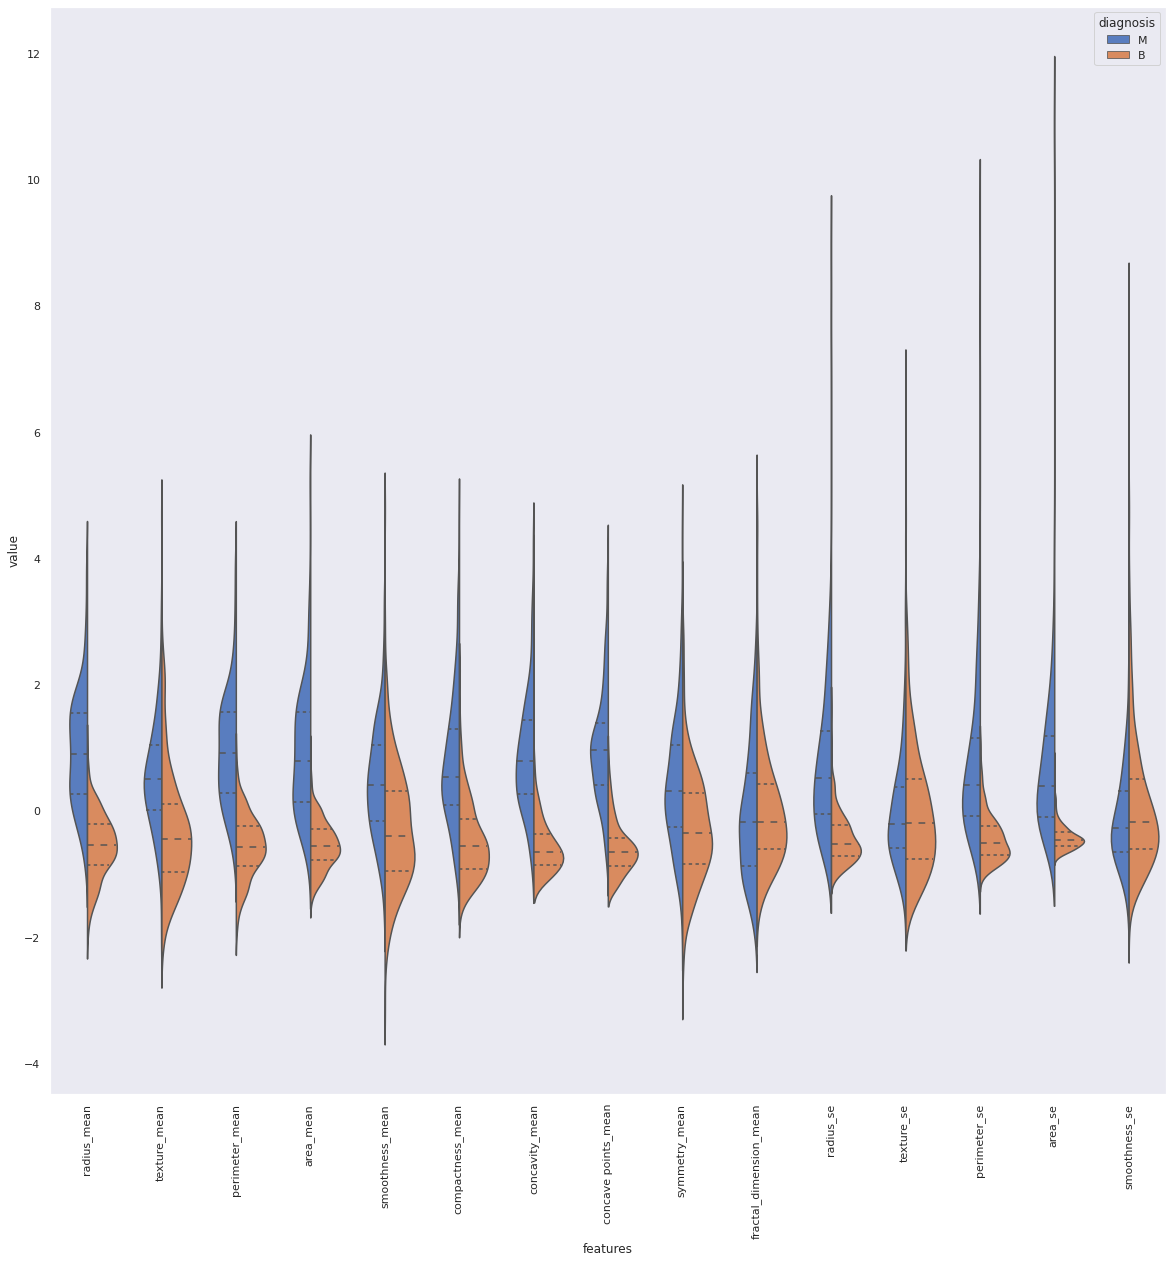

In [ ]:
sns.set_style("dark")

#standardisation
data_norm = (x-x.mean())/(x.std()) 

data = pd.concat([y,data_norm.iloc[:,0:15]],axis=1)

#To be able to plot all features w.r.t. to both class labels
data_melt = pd.melt(data,id_vars="diagnosis",var_name="features", value_name='value')

#Size of the figure
plt.figure(figsize=(20,20))

ax = sns.violinplot(x="features", y="value", hue="diagnosis",data=data_melt, inner='quartile', scale='count', split=True)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

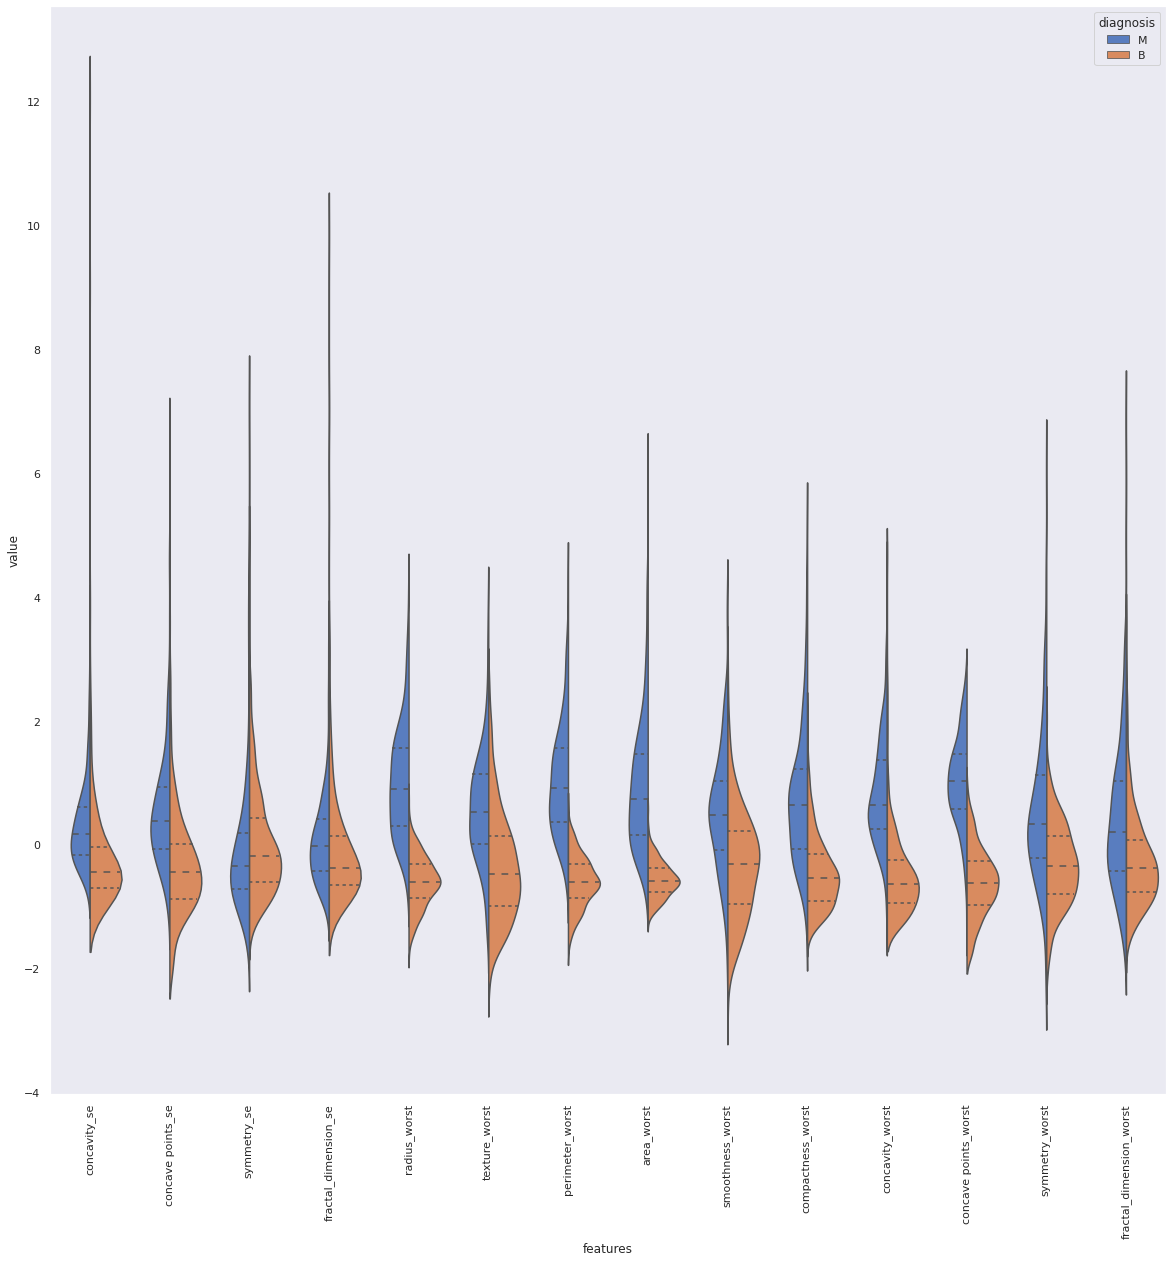

In [ ]:
data_norm = (x-x.mean())/(x.std())

data = pd.concat([y,data_norm.iloc[:,16:]],axis=1)

data_melt = pd.melt(data,id_vars="diagnosis",var_name="features", value_name='value')


plt.figure(figsize=(20,20))

ax = sns.violinplot(x="features", y="value", hue="diagnosis",data=data_melt, inner='quartile', scale='count', split=True)

plt.xticks(rotation=90)

The above plots indicate the similarity in the quartile ranges for the 'M' and 'B' for the given feature values. For example, the medians almost coincide for the classes in the fractal_dimension_mean feature, indidcating that it may not be of too much use while classifying the data. Similar behaivour is exibhited by smoothness_se as well.

Considering another type of visualisation may further shed light on the nature of the features and for this purpose, a **swarm plot** is visualised below.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

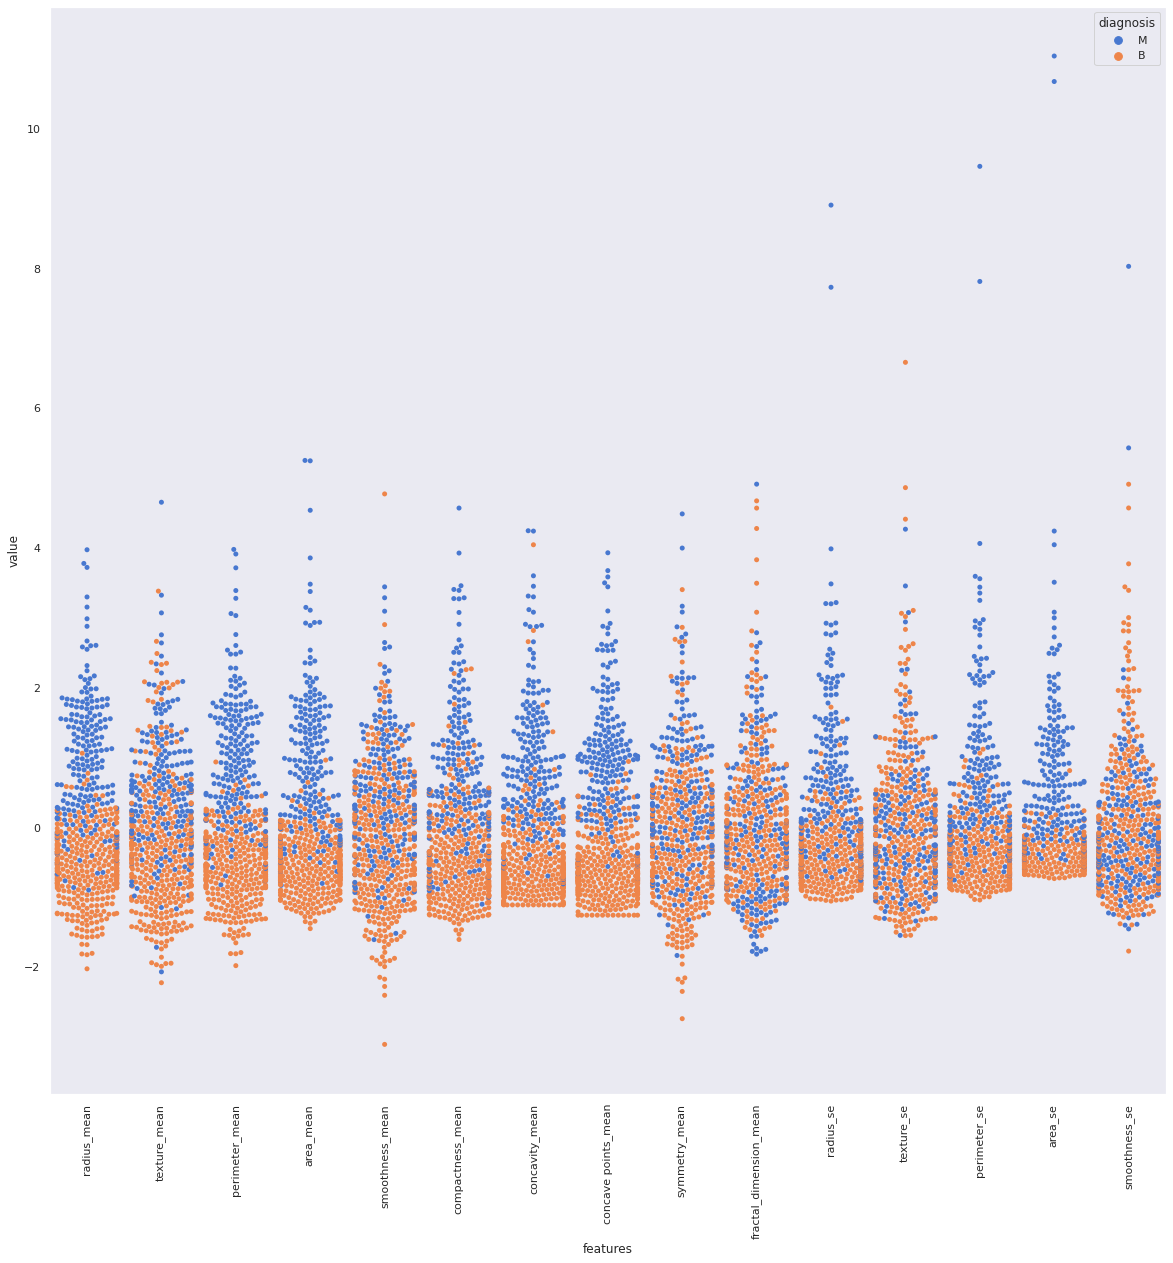

In [ ]:
data_norm = (x-x.mean())/(x.std())

data = pd.concat([y,data_norm.iloc[:,0:15]],axis=1)

data_melt = pd.melt(data,id_vars="diagnosis",var_name="features", value_name='value')


plt.figure(figsize=(20,20))

ax = sns.swarmplot(x="features", y="value", hue="diagnosis",data=data_melt)

plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.2% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

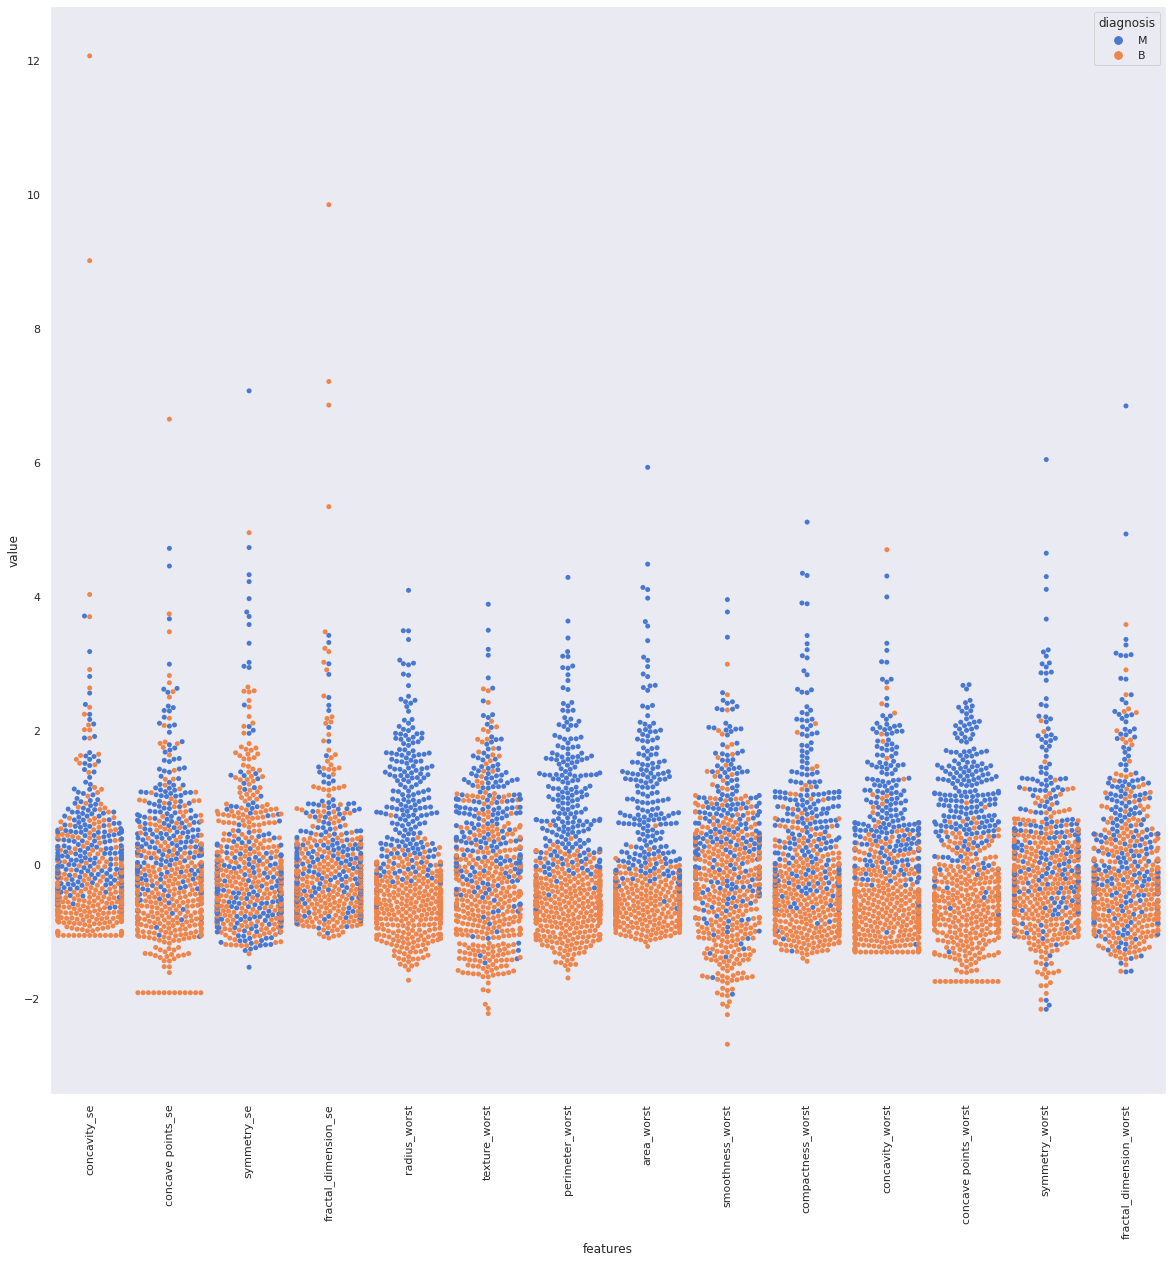

In [ ]:
data_norm = (x-x.mean())/(x.std())

data = pd.concat([y,data_norm.iloc[:,16:]],axis=1)

data_melt = pd.melt(data,id_vars="diagnosis",var_name="features", value_name='value')


plt.figure(figsize=(20,20))

ax = sns.swarmplot(x="features", y="value", hue="diagnosis",data=data_melt)

plt.xticks(rotation=90)

The above plots show the distribution of the datapoints for both classes of target label, diagnosis. In cases such as the feature, area_mean we can see a clear pattern of distribution based on the label with an approximate demarcation observed, as opposed to a feature such as fractal_dimension_worst.

Another visualisation that proves to be useful is a **heatmap**, which shows the correlation between the features of the dataset. This can then be used for feature selection.

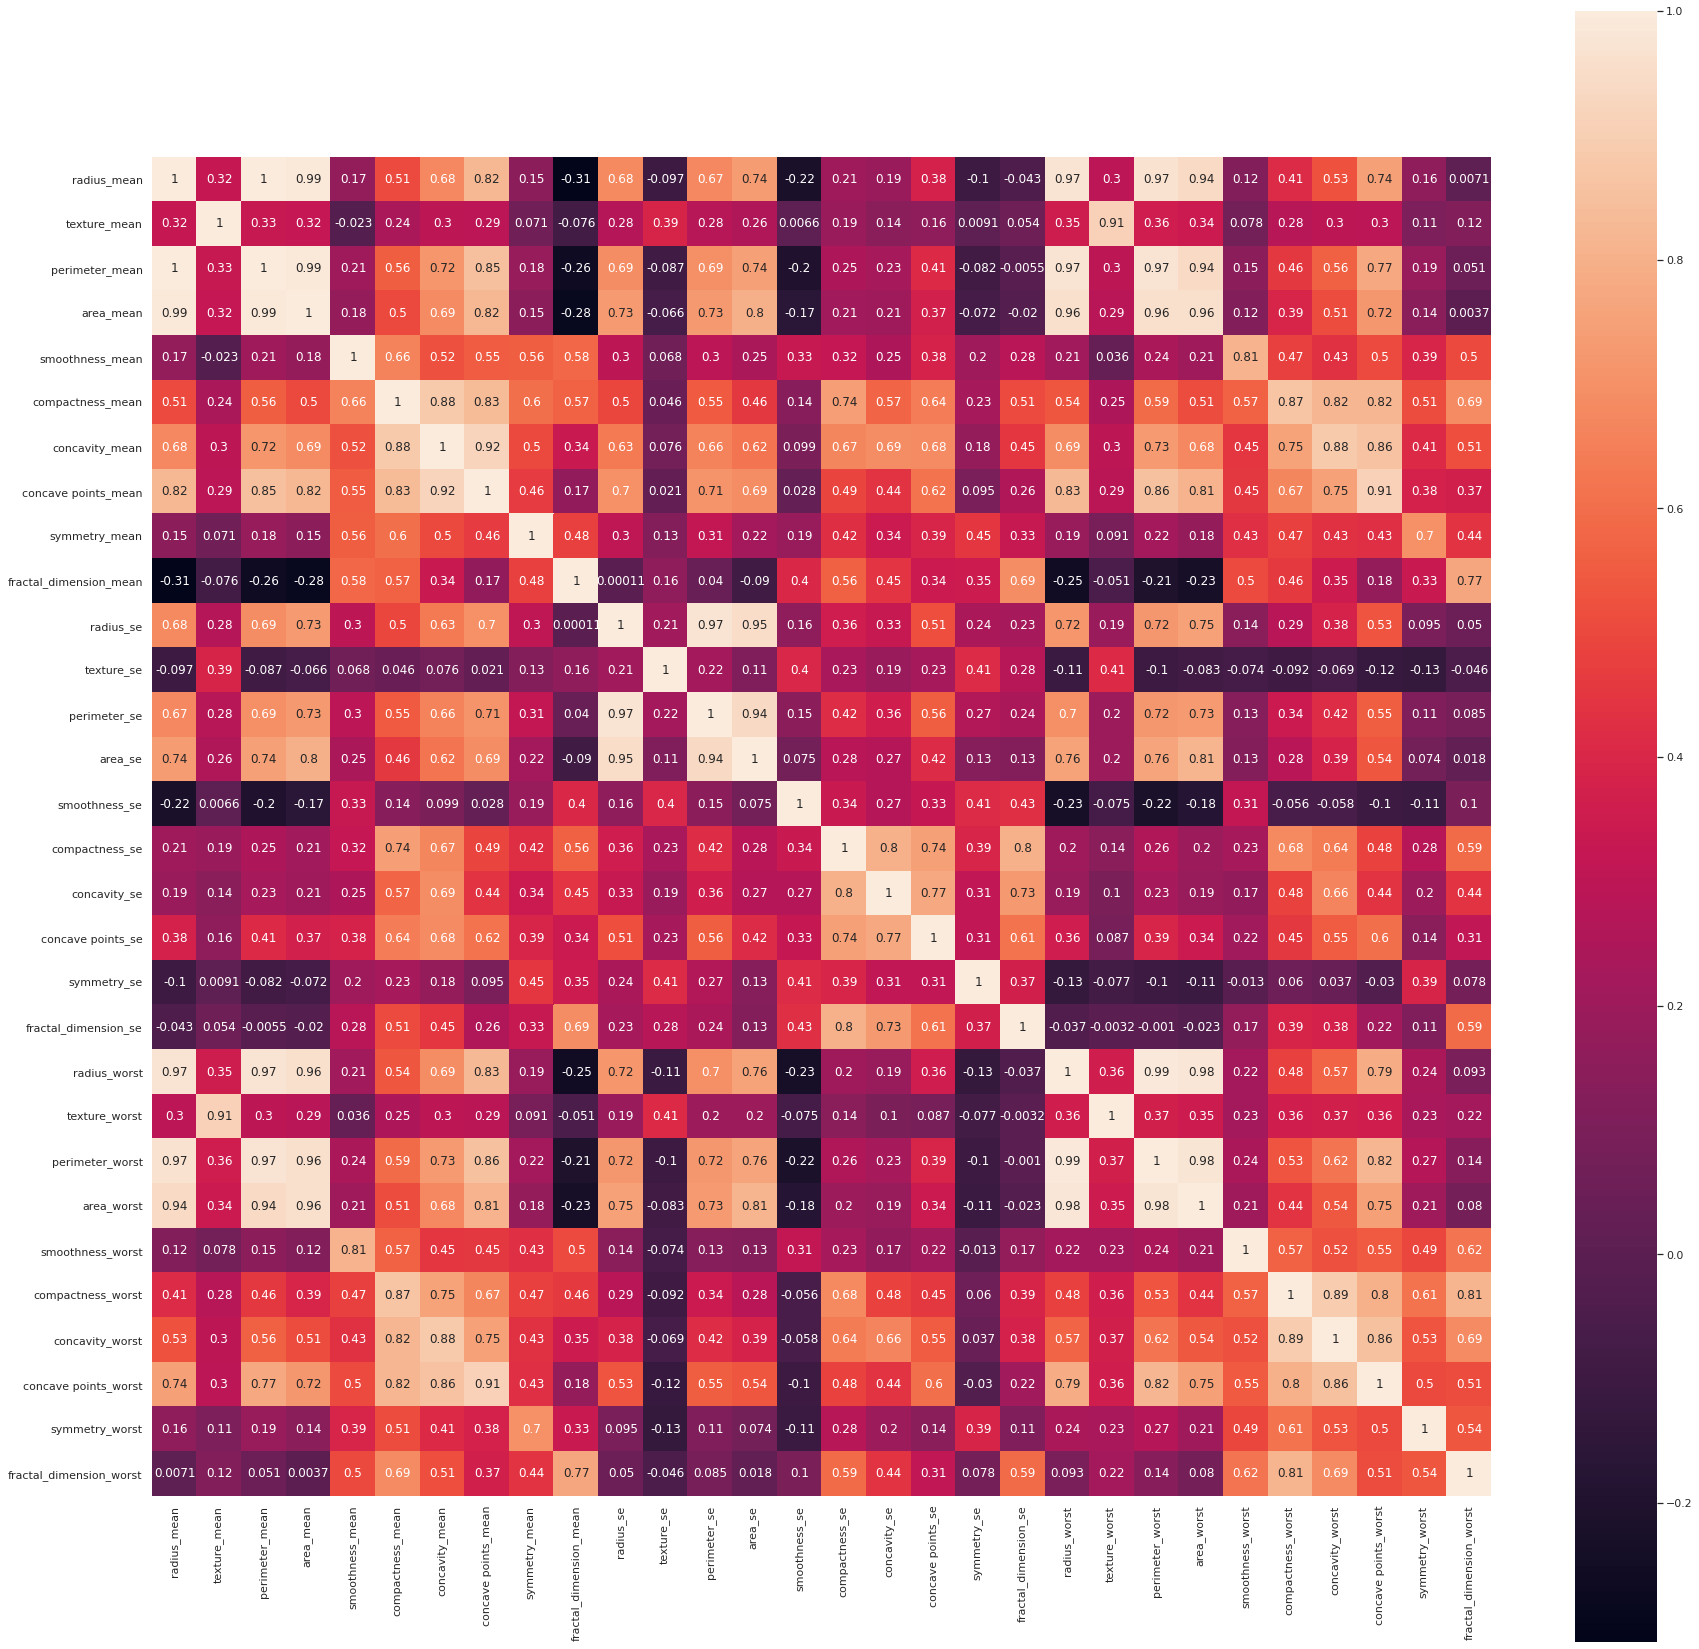

In [ ]:
data = x

plt.figure(figsize=(30,30))

sns.heatmap(data.corr(), annot = True,square=True)

# **Feature Selection Based on correlation**

From the above correlation matrix, we can observe certain correlated features. The features **perimeter_mean, radius_mean, and area_mean** are correlated so only **area_mean** is retained. Similarly,  **perimeter_se, radius_se, and area_se** are correlated so only **area_se** is retained. This is the case with  **perimeter_worst, radius_worst, and area_worst** as well. Since, **area_mean** and **area_worst** are correlated, **area_mean** is retained.

A similar approach is taken for concave points, compactness, and concavity, in this case, **concavity_se**, and **concavity_mean** being retained. Between, **texture_worst**, and **texture_mean**, the latter is kept. 

In [ ]:

droplist = ['perimeter_mean','radius_mean','area_worst','perimeter_worst','radius_worst','perimeter_se','radius_se','compactness_mean','concave points_mean', 
            'concave points_worst','compactness_worst','concavity_worst','compactness_se','concave points_se','texture_worst','texture_se']


x = x.drop(droplist,axis=1)
x.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


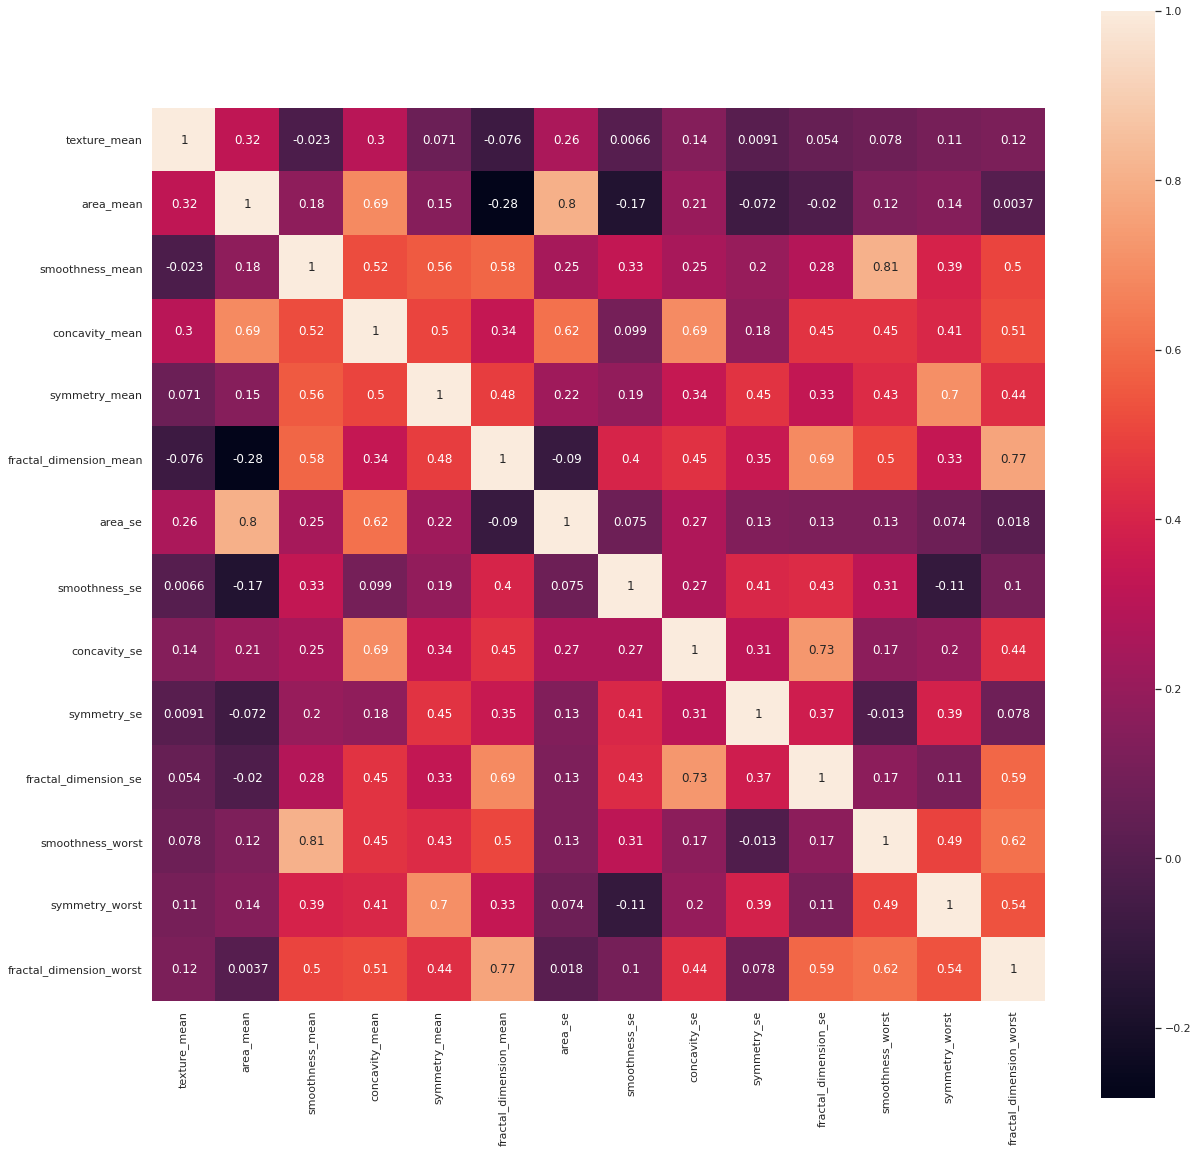

In [ ]:
data = x

plt.figure(figsize=(20,20))

sns.heatmap(data.corr(), annot = True,square=True)

# **Splitting the test and train data**

The data is split into two sets used for training, and testing with 70% being training data and the rest, test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# **Fitting and Prediction using Decision Tree Classifier Model**

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=4)

#Fitting the model to x_train and y_train model
clf = clf.fit(x_train,y_train)

#Prediction using the x_test data
result = clf.predict(x_test)

#checking accuracy of the model
ac= accuracy_score(y_test, result)

print('Accuracy for the model is:',ac)

Accuracy for the model is: 0.9532163742690059


# Visualising the Decision Tree

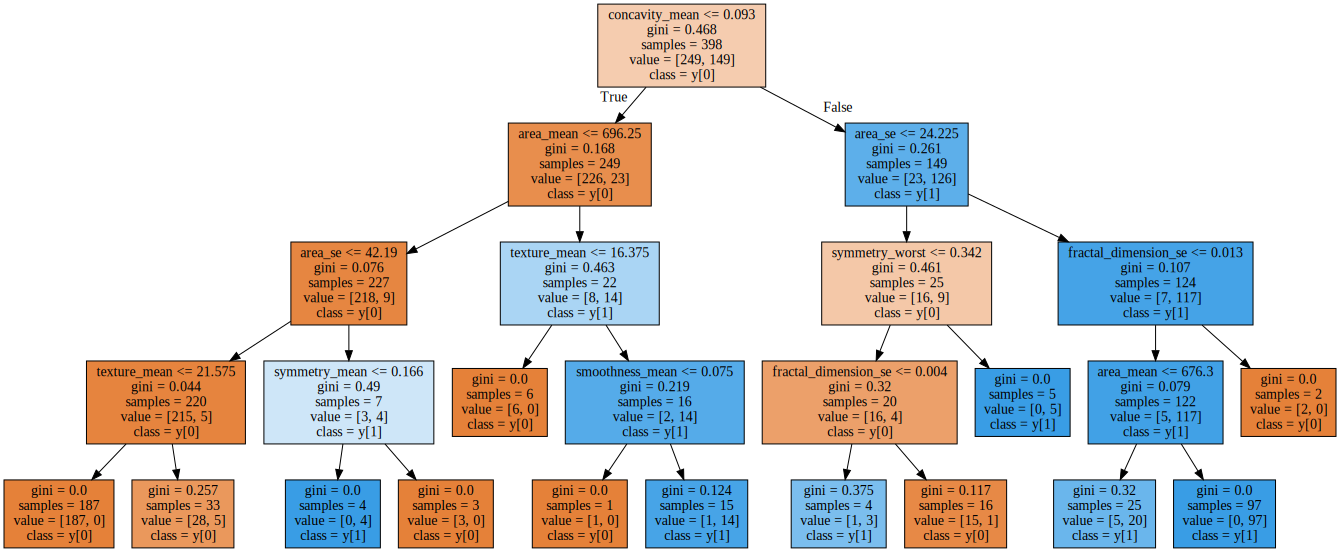

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x.columns,  
                                class_names=True,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data) 
graph

# **Confusion Matrix and Evaluation Metrics**

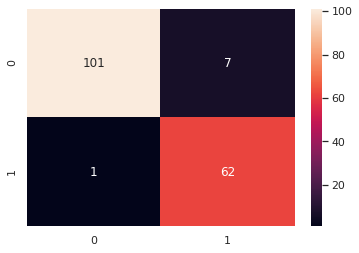

In [ ]:
cm = confusion_matrix(y_test, result)
sns.heatmap(cm,annot=True,fmt="d")

**F1 Score of Model**

In [ ]:
# f1 score
score = f1_score(y_test, result, pos_label='M')

# print
print ("Decision Tree F1 score:",score)

Decision Tree F1 score: 0.9393939393939393


# **Improving Accuracy**

The accuracy of the model was initially obtained as 91.12 and was increased by setting the max_depth to 4 to prevent overfitting on the training data. Further, accuracy was also dependent on the features used.

Futher improvement can be done by considering hyperparameter tuning og the decision tree classifier, taking into account the parameters such max_features, max_samples_split,etc.

In [ ]:
import numpy as np
import pandas as pd

X = np.array([[2,9],[1,5],[3,6]])
y = np.array([[92],[86],[82]])
X = X/np.amax(X, axis=0)
y = y/100

def sigmoid(x):
	return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
	return x*(1-x)

epoch = 7000
lr = 0.1
input_lay = 2
hidden_lay = 3
output_lay = 1

wh = np.random.uniform(size = (input_lay,hidden_lay))
bh = np.random.uniform(size = (1,hidden_lay))
wout = np.random.uniform(size = (hidden_lay,output_lay))
bout = np.random.uniform(size = (1,output_lay))

for i in range(epoch):
	
  hid_in = np.dot(X,wh) + bh
  hid_act = sigmoid(hid_in)
  out_in = np.dot(hid_act,wout) + bout
  output = sigmoid(out_in)
  EO = y-output
  outgrad = derivative_sigmoid(output)
  d_output = EO*outgrad
  EH = d_output.dot(wout.T)
  d_hidden = EH*derivative_sigmoid(hid_act)

  wout += hid_act.T.dot(d_output)*lr
  wh += X.T.dot(d_hidden)*lr

print("Input:\n",X)
print("Target Output:\n",y)
print("Obtained Output:\n",output)

Input:
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Target Output:
 [[0.92]
 [0.86]
 [0.82]]
Obtained Output:
 [[0.87161514]
 [0.86103622]
 [0.86746821]]
